# Building Machine Learning Model

# Part1-Data Preprocessing

Step1- Importing Libraries for Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Step2- Import Dataset

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c8220ad3ad3b4c8ab836601aada5d8b6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='PJKqGWbvDMVLsp-YbdmOk6mWpwOR7zHfgQzOilREEkWr',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_c8220ad3ad3b4c8ab836601aada5d8b6.get_object(Bucket='salaryprediction-donotdelete-pr-1bwlvsqk8ctsv0',Key='homeprices.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_excel(body)
dataset.head()


,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [3]:
type(dataset)


pandas.core.frame.DataFrame

In [4]:
dataset

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [5]:
dataset.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [6]:
dataset.head(5)

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Step3- Split Independent and Dpendent Variables

In [7]:
x= dataset.iloc[:,:1]

In [8]:
x

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [9]:
type(x)

pandas.core.frame.DataFrame

In [10]:
x= dataset.iloc[:,:-1].values #convert from dataframe to numpy array

In [11]:
x

array([[2600],
       [3000],
       [3200],
       [3600],
       [4000]])

In [12]:
x.ndim #mandatory to be in 2 dimesion for Linear Regression

2

In [13]:
type(x)

numpy.ndarray

In [14]:
y= dataset.iloc[:,1:]

In [15]:
y

,price
0,550000
1,565000
2,610000
3,680000
4,725000


In [16]:
y= dataset.iloc[:,1:].values

In [17]:
y

array([[550000],
       [565000],
       [610000],
       [680000],
       [725000]])

Step6- Split Test and Train Data

In [18]:
from sklearn.model_selection import train_test_split                #previously cros_validation was used in sklearn
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
x_train

array([[2600],
       [3000],
       [3600],
       [4000]])

In [20]:
x_test

array([[3200]])

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr=LinearRegression()

In [23]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
y_predict=lr.predict(x_test)

In [25]:
y_predict

array([[616465.51724138]])

In [26]:
y_test

array([[610000]])

In [27]:
lr.predict(np.array([[5]]))

array([[184038.79310345]])

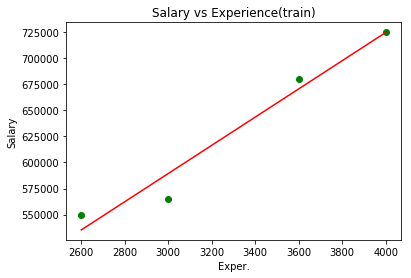

In [28]:
#visualization of train data
plt.scatter(x_train,y_train,color = 'green')
plt.plot(x_train,lr.predict(x_train),color = 'Red')
plt.xlabel("Exper.")
plt.ylabel("Salary")
plt.title("Salary vs Experience(train)")
plt.show()

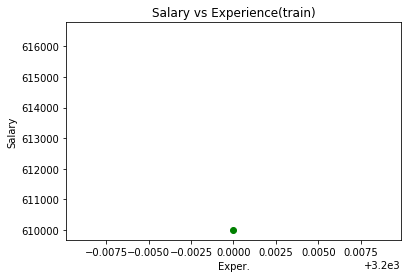

In [29]:
#visualization of train data
plt.scatter(x_test,y_test,color = 'green')
plt.plot(x_test,lr.predict(x_test),color = 'Red')
plt.xlabel("Exper.")
plt.ylabel("Salary")
plt.title("Salary vs Experience(train)")
plt.show()

In [30]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-07-01 08:27:20,217 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [31]:
wml_credentials = {
  "apikey": "Y9tWxvLLwSgqtUQN5JduJfDcta6R3SxU3yFHePtioIa4",
  "iam_apikey_description": "Auto-generated for key b126ccae-5caf-4653-9ee1-7e2a04ef0baf",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/71172d6d8b634783a71aa251ca15a717::serviceid:ServiceId-e3901f06-04f8-4600-bdcf-32ce363d49d2",
  "instance_id": "198a8437-ec6b-41cc-a405-404958295cec",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [32]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [33]:
model_props = {
    client.repository.ModelMetaNames.AUTHOR_NAME : "jyothi",
    client.repository.ModelMetaNames.AUTHOR_EMAIL : "jyothiniranjanburla@gmail.com",
    client.repository.ModelMetaNames.NAME : "salary data"
}

In [34]:
model_artifact = client.repository.store_model(lr,meta_props = model_props)

In [35]:
model_artifact

{'metadata': {'guid': '0fd34a19-60a5-4886-abb6-0a7ee9c86ae0',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/198a8437-ec6b-41cc-a405-404958295cec/published_models/0fd34a19-60a5-4886-abb6-0a7ee9c86ae0',
  'created_at': '2020-07-01T08:27:20.963Z',
  'modified_at': '2020-07-01T08:27:21.012Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/198a8437-ec6b-41cc-a405-404958295cec/published_models/0fd34a19-60a5-4886-abb6-0a7ee9c86ae0/learning_configuration',
  'author': {'name': 'jyothi'},
  'name': 'salary data',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/198a8437-ec6b-41cc-a405-404958295cec/published_models/0fd34a19-60a5-4886-abb6-0a7ee9c86ae0/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/198a8437-ec6b-41cc-a405-404958295cec/published_models/0fd34a19-60a5-4886-abb6-0a7ee9c86ae0/feedback',
  'latest_version': {'url': 'https

In [36]:
guid = client.repository.get_model_uid(model_artifact)

In [37]:
guid

'0fd34a19-60a5-4886-abb6-0a7ee9c86ae0'

In [38]:
deploy = client.deployments.create(guid,name="Salary Prediction")



#######################################################################################

Synchronous deployment creation for uid: '0fd34a19-60a5-4886-abb6-0a7ee9c86ae0' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='7ce9fedb-582e-4a55-baab-d7590dde0d4a'
------------------------------------------------------------------------------------------------




In [40]:
deploy

{'metadata': {'guid': '7ce9fedb-582e-4a55-baab-d7590dde0d4a',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/198a8437-ec6b-41cc-a405-404958295cec/deployments/7ce9fedb-582e-4a55-baab-d7590dde0d4a',
  'created_at': '2020-07-01T08:31:03.244Z',
  'modified_at': '2020-07-01T08:31:03.490Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'name': 'Salary Prediction',
  'scoring_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/198a8437-ec6b-41cc-a405-404958295cec/deployments/7ce9fedb-582e-4a55-baab-d7590dde0d4a/online',
  'deployable_asset': {'name': 'salary data',
   'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/198a8437-ec6b-41cc-a405-404958295cec/published_models/0fd34a19-60a5-4886-abb6-0a7ee9c86ae0',
   'guid': '0fd34a19-60a5-4886-abb6-0a7ee9c86ae0',
   'created_at': '2020-07-01T08:31:03.220Z',
   'type': 'model'},
  'description': 'Description of deployment',
  'status_details': {'status': 'DEPLOY_SUCCESS'},
  'model_type': 'scikit-learn-0.20',
  'status': '

In [41]:
scoring_url = client.deployments.get_scoring_url(deploy)

In [42]:
scoring_url

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/198a8437-ec6b-41cc-a405-404958295cec/deployments/7ce9fedb-582e-4a55-baab-d7590dde0d4a/online'